[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/fonnesbeck/Bios8366/blob/master/notebooks/Section7_2-Introduction-to-PyTorch.ipynb)

# Introduction to PyTorch

![](https://github.com/fonnesbeck/Bios8366/blob/master/notebooks/images/Pytorch_logo.png?raw=true)

PyTorch is one of the most popular deep learning Python libraries, and it is widely used by the AI research community. Many developers and researchers use PyTorch to accelerate deep learning research experimentation and prototyping.

The PyTorch library is primarily developed by Facebook’s AI Research Lab (FAIR) and is free and open source software with over 1,700 contributors. It allows you to easily run array-based calculations, build dynamic neural networks, and perform autodifferentiation in Python with strong graphics processing unit (GPU) acceleration—all important features required for deep learning research. Although some use it for accelerated tensor computing, most use it for deep learning development.

PyTorch’s simple and flexible interface enables fast experimentation. You can load data, apply transforms, and build models with a few lines of code. Then, you have the flexibility to write customized training, validation, and test loops and deploy trained models with ease.

Many developers and researchers use PyTorch to accelerate deep learning research experimentation and prototyping. Its simple Python API, GPU support, and flexibility make it a popular choice among academic and commercial research organizations. Since being open sourced in 2018, PyTorch has reached a stable release and can be easily installed on Windows, Mac, and Linux operating systems. The framework continues to expand rapidly and now facilitates deployment to production environments in the cloud and mobile platforms.

## PyTorch Programming Concepts

PyTorch's computation takes place over a **directed graph**, which is comprised of a set of *nodes* and associated *edges*, used to describe operations and tensors.

![](https://github.com/fonnesbeck/Bios8366/blob/master/notebooks/images/tf_dag.png?raw=true)

### Tensors

We were introduced to tensors in previous sections, when we discussed PyMC and Aesara. Similarly in PyTorch, a tensor is the fundamental data structure for storing and manipulating data. Like an Aesara tensor (or a NumPy array, for that matter), a tensor is a multidimensional array containing elements of a single data type. Tensors can be used to represent scalars, vectors, matrices, and n-dimensional arrays and are derived from the torch.Tensor class. However, tensors are more than just arrays of numbers. Creating or instantiating a tensor object from the `torch.Tensor` class gives us access to a set of built-in class attributes and operations or class methods that provide a robust set of built-in capabilities. 

Tensors also include added benefits that make them more suitable than NumPy arrays for deep learning calculations. Importantly, tensor operations can be performed significantly faster using **GPU acceleration**. Also, tensors can be stored and manipulated at scale using **distributed** processing on multiple CPUs and GPUs and across multiple servers. And third, tensors keep track of their graph computations, which is very important in implementing a deep learning library.

### Simple CPU Example

Here’s a simple example that creates a tensor, performs a tensor operation, and uses a built-in method on the tensor itself. By default, the tensor data type will be derived from the input data type and the tensor will be allocated to the CPU device. 

First, we import the PyTorch library, then we create two tensors, `x` and `y`, from two-dimensional lists. 

Next, we add the two tensors and store the result in `z`. We can just use the `+` operator here because the `torch.Tensor` class supports operator overloading. 

Finally, we print the new tensor, `z`, which we can see is the matrix sum of `x` and `y`, and we print the size of `z`. Notice that `z` is a tensor object itself and the `size()` method is used to return its matrix dimensions, namely 2 × 3:

In [ ]:
import torch

x = torch.tensor([[1,2,3],[4,5,6]])
y = torch.tensor([[7,8,9],[10,11,12]])
z = x + y
print(z)

In [ ]:
z.size()

### Simple GPU Example

The ability to accelerate tensor operations on a GPU is a major advantage of tensors over NumPy arrays. This is the same example from above, but here we move the tensors to the GPU device if one is available. Notice that the output tensor is also allocated to the GPU. You can use the device attribute (e.g., `z.device`) to confirm where the tensor resides.

The `torch.cuda.is_available()` function will return `True` if your machine has GPU support. If your machine contains multiple GPUs, you can also control which GPU is being used.

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"

x = torch.tensor([[1,2,3],[4,5,6]],
                 device=device)
y = torch.tensor([[7,8,9],[10,11,12]],
                 device=device)
z = x + y
print(z)

print(z.device)

### GPU support

A crucial feature of PyTorch is the support of GPUs, short for Graphics Processing Unit. A GPU can perform many thousands of small operations in parallel, making it very well suitable for performing large matrix operations in neural networks. When comparing GPUs to CPUs, we can list the following main differences (credit: [Kevin Krewell, 2009](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/)) 

![](https://github.com/fonnesbeck/Bios8366/blob/master/notebooks/images/comparison_CPU_GPU.png?raw=true)

CPUs and GPUs have both different advantages and disadvantages, which is why many computers contain both components and use them for different tasks. In case you are not familiar with GPUs, you can read up more details in this [NVIDIA blog post](https://blogs.nvidia.com/blog/2009/12/16/whats-the-difference-between-a-cpu-and-a-gpu/) or [here](https://www.intel.com/content/www/us/en/products/docs/processors/what-is-a-gpu.html). 

GPUs can accelerate the training of your network up to a factor of $100$ which is essential for large neural networks. PyTorch implements a lot of functionality for supporting GPUs (mostly those of NVIDIA due to the libraries [CUDA](https://developer.nvidia.com/cuda-zone) and [cuDNN](https://developer.nvidia.com/cudnn)). First, let's check whether you have a GPU available:

In [ ]:
gpu_avail = torch.cuda.is_available()
print(f"Is the GPU available? {gpu_avail}")

If you have a GPU on your computer but the command above returns False, make sure you have the correct CUDA-version installed. On Google Colab, make sure that you have selected a GPU in your runtime setup (in the menu, check under `Runtime -> Change runtime type`). 

By default, all tensors you create are stored on the CPU. We can push a tensor to the GPU by using the function `.to(...)`, or `.cuda()`. However, it is often a good practice to define a `device` object in your code which points to the GPU if you have one, and otherwise to the CPU. Then, you can write your code with respect to this device object, and it allows you to run the same code on both a CPU-only system, and one with a GPU. Let's try it below. We can specify the device as follows: 

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print("Device", device)

Now let's create a tensor and push it to the device:

In [ ]:
x = torch.zeros(2, 3)
x = x.to(device)
print("X", x)

In case you have a GPU, you should now see the attribute `device='cuda:0'` being printed next to your tensor. The zero next to cuda indicates that this is the zero-th GPU device on your computer. PyTorch also supports multi-GPU systems, but this you will only need once you have very big networks to train (if interested, see the [PyTorch documentation](https://pytorch.org/docs/stable/distributed.html#distributed-basics)). We can also compare the runtime of a large matrix multiplication on the CPU with a operation on the GPU:

In [ ]:
import time
x = torch.randn(5000, 5000)

## CPU version
start_time = time.time()
_ = torch.matmul(x, x)
end_time = time.time()
print(f"CPU time: {(end_time - start_time):6.5f}s")

## GPU version
x = x.to(device)
# CUDA is asynchronous, so we need to use different timing functions
start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)
start.record()
_ = torch.matmul(x, x)
end.record()
torch.cuda.synchronize()  # Waits for everything to finish running on the GPU
print(f"GPU time: {0.001 * start.elapsed_time(end):6.5f}s")  # Milliseconds to seconds

Depending on the size of the operation and the CPU/GPU in your system, the speedup of this operation can be >50x. As `matmul` operations are very common in neural networks, we can already see the great benefit of training a NN on a GPU. The time estimate can be relatively noisy here because we haven't run it for multiple times. Feel free to extend this, but it also takes longer to run.

When generating random numbers, the seed between CPU and GPU is not synchronized. Hence, we need to set the seed on the GPU separately to ensure a reproducible code. Note that due to different GPU architectures, running the same code on different GPUs does not guarantee the same random numbers. Still, we don't want that our code gives us a different output every time we run it on the exact same hardware. Hence, we also set the seed on the GPU:

In [ ]:
# GPU operations have a separate seed we also want to set
if torch.cuda.is_available(): 
    torch.cuda.manual_seed(42)
    torch.cuda.manual_seed_all(42)

## Creating Tensors

You can create tensors from preexisting numeric data or create random samplings. Tensors can be created from preexisting data stored in built-in structures such as lists, tuples, scalars, or serialized data files, as well as in NumPy arrays.

The function `torch.Tensor` allocates memory for the desired tensor, but reuses any values that have already been in the memory. To directly assign values to the tensor during initialization, there are many alternatives including:

* `torch.zeros`: Creates a tensor filled with zeros
* `torch.ones`: Creates a tensor filled with ones
* `torch.rand`: Creates a tensor with random values uniformly sampled between 0 and 1
* `torch.randn`: Creates a tensor with random values sampled from a normal distribution with mean 0 and variance 1
* `torch.arange`: Creates a tensor containing the values $N,N+1,N+2,...,M$
* `torch.Tensor` (input list): Creates a tensor from the list elements you provide

In [ ]:
import numpy

# Created from preexisting arrays
w = torch.tensor([1,2,3])
w = torch.tensor((1,2,3))
w = torch.tensor(numpy.array([1,2,3]))

# Initialized by size
w = torch.empty(100,200)
w = torch.zeros(100,200)
w = torch.ones(100,200)

If you want to initialize a tensor with random values, PyTorch supports a robust set of functions that you can use, such as torch.`rand()`, `torch.randn()`, and `torch.randint()`.

In [ ]:
# Initialized by size with random values
w = torch.rand(100,200)     
w = torch.randn(100,200)    
w = torch.randint(5,10,(100,200))  

# Initialized with specified data type or device
w = torch.empty((100,200), dtype=torch.float64,
                device=device)

# Initialized to have the same size, data type,
#   and device as another tensor
x = torch.empty_like(w)

In addition, functions with the _like postfix such as `torch.empty_like()` and `torch.ones_like()` return tensors that have the same size, data type, and device as another tensor but are initialized differently.

## Tensor Attributes

One PyTorch quality that has contributed to its popularity is the fact that it’s very Pythonic and object oriented in nature. Since a tensor is its own data type, you can read attributes of the tensor object itself. Assuming `x` is a tensor, you can access several attributes of `x` as follows:

`x.dtype`

- Indicates the tensor’s data type (see Table 2-2 for a list of PyTorch data types)

`x.device`

- Indicates the tensor’s device location (e.g., CPU or GPU memory)

`x.shape`

- Shows the tensor’s dimensions

`x.ndim`

- Identifies the number of a tensor’s dimensions or rank

`x.requires_grad`

- A Boolean attribute that indicates whether the tensor keeps track of graph computations (see “Automatic Differentiation (Autograd)”)

`x.grad`

- Contains the actual gradients if requires_grad is True

`x.grad_fn`

- Stores the graph computation function used if requires_grad is True

`x.s_cuda`, `x.is_sparse`, `x.is_quantized`, `x.is_leaf`, `x.is_mkldnn`

- Boolean attributes that indicate whether the tensor meets certain conditions

`x.layout`

- Indicates how a tensor is laid out in memory

## Data Types

During deep learning development, it’s important to be aware of the data type used by your data and its calculations. So when you create tensors, you should control what data types are being used. You can specify the data type when creating the tensor by using the `dtype` parameter, or you can cast a tensor to a new dtype using the appropriate casting method or the `to()` method:

In [ ]:
# Specify the data type at creation using dtype
w = torch.tensor([1,2,3], dtype=torch.float32)

# Use the casting method to cast to a new data type
w.int()       # w remains a float32 after the cast
w = w.int()   # w changes to an int32 after the cast

# Use the to() method to cast to a new type
w = w.to(torch.float64) 
w = w.to(dtype=torch.float64) 

# Python automatically converts data types during
# operations
x = torch.tensor([1,2,3], dtype=torch.int32)
y = torch.tensor([1,2,3], dtype=torch.float32)
z = x + y 
print(z.dtype)


## Tensor Operations

PyTorch supports a robust set of tensor operations that allow you to access and transform your tensor data.

### Indexing, Slicing, Combining, and Splitting Tensors

Once you have created tensors, you may want to access portions of the data and combine or split tensors to form new tensors. You can slice and index tensors in the same way you would slice and index NumPy arrays. Note that indexing and slicing will return tensors even if the array is only a single element. You will need to use the `item()` function to convert a single-element tensor to a Python value when passing to other functions like `print()`:

In [ ]:
x = torch.tensor([[1,2],[3,4],[5,6],[7,8]])
x

In [ ]:
x[1,1]

In [ ]:
x[1,1].item()

In [ ]:
# Slicing
x[:2,1]

In [ ]:
# Boolean indexing
x[x<5]

PyTorch also supports transposing and reshaping arrays

In [ ]:
# Transpose array; x.t() or x.T can be used
x.t()

In [ ]:
# Change shape; usually view() is preferred over
# reshape()
x.view((2,4))

You can also combine or split tensors by using functions like `torch.stack()` and `torch.unbind()`, respectively.

In [ ]:
# Combining tensors
y = torch.stack((x, x))
y

PyTorch provides a robust set of built-in functions that can be used to access, split, and combine tensors in different ways.

`torch.cat()`
- Concatenates the given sequence of tensors in the given dimension.

`torch.chunk()`
- Splits a tensor into a specific number of chunks. Each chunk is a view of the input tensor.

`torch.gather()`
- Gathers values along an axis specified by the dimension.

`torch.index_select()`
- Returns a new tensor that indexes the input tensor along a dimension using the entries in the index, which is a LongTensor.

`torch.masked_select()`
- Returns a new 1D tensor that indexes the input tensor according to the Boolean mask, which is a BoolTensor.


`torch.narrow()`
- Returns a tensor that is a narrow version of the input tensor.

`torch.nonzero()`
- Returns the indices of nonzero elements.

`torch.reshape()`
- Returns a tensor with the same data and number of elements as the input tensor, but a different shape. Use view() instead to ensure the tensor is not copied.

`torch.split()`
- Splits the tensor into chunks. Each chunk is a view or subdivision of the original tensor.

`torch.squeeze()`
- Returns a tensor with all the dimensions of the input tensor of size 1 removed.

`torch.stack()`
- Concatenates a sequence of tensors along a new dimension.

`torch.t()`
- Expects the input to be a 2D tensor and transposes dimensions 0 and 1.

`torch.take()`
- Returns a tensor at specified indices when slicing is not continuous.

`torch.transpose()`
- Transposes only the specified dimensions.

`torch.unbind()`
- Removes a tensor dimension by returning a tuple of the removed dimension.

`torch.unsqueeze()`
- Returns a new tensor with a dimension of size 1 inserted at the specified position.

`torch.where()`
- Returns a tensor of selected elements from either one of two tensors, depending on the specified condition.

Tensors can also be converted back into NumPy arrays using the `numpy()` method.

In [ ]:
tensor = torch.arange(4)
np_arr = tensor.numpy()

print("PyTorch tensor:", tensor)
print("Numpy array:", np_arr)

The conversion of tensors to numpy require the tensor to be on the CPU, and not the GPU. In case you have a tensor on GPU, you need to call `.cpu()` on the tensor beforehand. Hence, you get a line like `np_arr = tensor.cpu().numpy()`.

### Tensor Operations for Mathematics

Deep learning development is strongly based on mathematical computations, so PyTorch supports a very robust set of built-in math functions. Whether you are creating new data transforms, customizing loss functions, or building your own optimization algorithms, you can speed up your research and development with the math functions provided by PyTorch.

PyTorch supports many different types of math functions, including pointwise operations, reduction functions, comparison calculations, and linear algebra operations, as well as spectral and other math computations. 

For example, a commonly used operation is matrix multiplication, which are essential for neural networks. If we have an input vector `x`, which is transformed using a learned weight matrix `w`, this can be computed in several ways:

- `torch.matmul`: Performs the matrix product over two tensors, where the specific behavior depends on the dimensions. If both inputs are matrices (2-dimensional tensors), it performs the standard matrix product. For higher dimensional inputs, the function supports broadcasting (for details see the documentation). Can also be written as `a @ b`, similar to numpy.

- `torch.mm`: Performs the matrix product over two matrices, but doesn’t support broadcasting

- `torch.bmm`: Performs the matrix product with a support batch dimension. If the first tensor `T` is of shape `(b, n, m)`, and the second tensor `R` is `(b, m, p)`, the output `O` is of shape `(b, n, p)`, and has been calculated by performing `b` matrix multiplications of the submatrices of `T` and `R`: `O[i] = T[i] @ R[i]`. 

- `torch.einsum`: Performs matrix multiplications and more (i.e. sums of products) using the Einstein summation convention.

In [ ]:
x = torch.arange(6)
x = x.view(2, 3)
print("X", x)

In [ ]:
W = torch.arange(9).view(3, 3) # We can also stack multiple operations in a single line
print("W", W)

In [ ]:
h = torch.matmul(x, W) # Verify the result by calculating it by hand too!
print("h", h)

### Dynamic Computation Graph and Backpropagation

One of the main reasons for using PyTorch in Deep Learning projects is that we can automatically get **gradients/derivatives** of functions that we define. We will mainly use PyTorch for implementing neural networks, and they are just fancy functions. If we use weight matrices in our function that we want to learn, then those are called the **parameters** or simply the **weights**.

If our neural network would output a single scalar value, we would talk about taking the **derivative**, but you will see that quite often we will have **multiple** output variables ("values"); in that case we talk about **gradients**. It's a more general term.

Given an input $\mathbf{x}$, we define our function by **manipulating** that input, usually by matrix-multiplications with weight matrices and additions with so-called bias vectors. As we manipulate our input, we are automatically creating a **computational graph**. This graph shows how to arrive at our output from our input. 

PyTorch is a **define-by-run** framework; this means that we can just do our manipulations, and PyTorch will keep track of that graph for us. Thus, we create a dynamic computation graph along the way.

So, the only thing we have to do is to compute the **output**, and then we can ask PyTorch to automatically get the **gradients**. 

The first thing we have to do is to specify which tensors require gradients. By default, when we create a tensor, it does not require gradients.

In [ ]:
x = torch.ones((3,))
print(x.requires_grad)

We can change this for an existing tensor using the function `requires_grad_()` (underscore indicating that this is a in-place operation). Alternatively, when creating a tensor, you can pass the argument `requires_grad=True` to most initializers we have seen above.

In [ ]:
x.requires_grad_(True)
print(x.requires_grad)

In order to get familiar with the concept of a computation graph, we will create one for the following function:

$$y = \frac{1}{|x|}\sum_i \left[(x_i + 2)^2 + 3\right]$$

You could imagine that $x$ are our parameters, and we want to optimize (either maximize or minimize) the output $y$. For this, we want to obtain the gradients $\partial y / \partial \mathbf{x}$. For our example, we'll use $\mathbf{x}=[0,1,2]$ as our input.

In [ ]:
x = torch.arange(3, dtype=torch.float32, requires_grad=True) # Only float tensors can have gradients
print("X", x)

Now let's build the computation graph step by step. You can combine multiple operations in a single line, but we will separate them here to get a better understanding of how each operation is added to the computation graph.

In [ ]:
a = x + 2
b = a ** 2
c = b + 3
y = c.mean()
print("Y", y)

Using the statements above, we have created the following computatino graph:

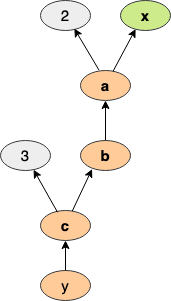

We calculate $a$ based on the inputs $x$ and the constant $2$, $b$ is $a$ squared, and so on. The visualization is an abstraction of the dependencies between inputs and outputs of the operations we have applied.

Each node of the computation graph has automatically defined a function for calculating the gradients with respect to its inputs, `grad_fn`. You can see this when we printed the output tensor $y$. This is why the computation graph is usually visualized in the reverse direction (arrows point from the result to the inputs). We can perform backpropagation on the computation graph by calling the function `backward()` on the last output, which effectively calculates the gradients for each tensor that has the property `requires_grad=True`:

In [ ]:
y.backward()

`x.grad` will now contain the gradient $\partial y/ \partial \mathcal{x}$, and this gradient indicates how a change in $\mathbf{x}$ will affect output $y$ given the current input $\mathbf{x}=[0,1,2]$:

In [ ]:
print(x.grad)

We can also verify these gradients by hand. We will calculate the gradients using the chain rule, in the same way as PyTorch did it:

$$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i}$$

Note that we have simplified this equation to index notation, and by using the fact that all operation besides the mean do not combine the elements in the tensor. The partial derivatives are:

$$
\frac{\partial a_i}{\partial x_i} = 1,\hspace{1cm}
\frac{\partial b_i}{\partial a_i} = 2\cdot a_i\hspace{1cm}
\frac{\partial c_i}{\partial b_i} = 1\hspace{1cm}
\frac{\partial y}{\partial c_i} = \frac{1}{3}
$$

Hence, with the input being $\mathbf{x}=[0,1,2]$, our gradients are $\partial y/\partial \mathbf{x}=[4/3,2,8/3]$. The previous code cell should have printed the same result.

## Data Loading

PyTorch provides powerful built-in classes and utilities, such as the `Dataset`, `DataLoader`, and `Sampler` classes, for loading various types of data. The `Dataset` class defines how to access and preprocess data from a file or data sources. The `Sampler` class defines how to sample data from a dataset in order to create batches, while the `DataLoader` class combines a dataset with a sampler and allows you to iterate over a set of batches.

PyTorch libraries such as Torchvision and Torchtext also provide classes to support specialized data like computer vision and natural language data. The torchvision.datasets module is a good example of how to utilize built-in classes to load data. The torchvision.datasets module provides a number of subclasses to load image data from popular academic datasets.

One of these popular datasets is CIFAR-10. The CIFAR-10 dataset consists of 50,000 training images and 10,000 test images of 10 possible objects: airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.


In [ ]:
from torchvision.datasets import CIFAR10

train_data = CIFAR10(root="./train/",
                     train=True,
                     download=True)

The `train` parameter determines whether we load the training data or the testing data, and setting `download` to `True` will download the data for us if we don’t have it already.

In [ ]:
train_data

In [ ]:
len(train_data)

In [ ]:
train_data.data.shape

In [ ]:
train_data.targets[:10]

In [ ]:
train_data.classes

In [ ]:
train_data.class_to_idx

In [ ]:
data, label = train_data[0]

In [ ]:
type(data)

In [ ]:
data

The data consists of a PIL image object. PIL is a common image format that uses the Pillow library to store image pixel values in the format of height × width × channels. A color image has three channels (RGB) for red, green, and blue.

We can also load the test data into another dataset object called test_data.

In [ ]:
test_data = CIFAR10(root="./test/",
                    train=False,
                    download=True)

In [ ]:
test_data

## Data Transforms

In the data loading step, we pulled data from its source and created dataset objects that contain information about the dataset and the data itself. However, the data might need to be adjusted before it is passed into the NN model for training and testing. For example, data values may be normalized to assist training, augmented to create larger datasets, or converted from one type of object to a tensor.

These adjustments are accomplished by applying transforms. The beauty of using transforms in PyTorch is that you can define a sequence of transforms and apply it when the data is accessed. 

In [ ]:
from torchvision import transforms

train_transforms = transforms.Compose([
  transforms.RandomCrop(32, padding=4),
  transforms.RandomHorizontalFlip(),
  transforms.ToTensor(),
  transforms.Normalize(
      mean=(0.4914, 0.4822, 0.4465),
      std=(0.2023, 0.1994, 0.2010))])

train_data = CIFAR10(root="./train/",
                     train=True,
                     download=True,
                     transform=train_transforms)

We define a set of transforms using the transforms.`Compose()` class. This class accepts a list of transforms and applies them in sequence. Here we randomly crop and flip images, convert them to tensors, and normalize the tensor values to predetermined means and standard deviations.

The transforms are passed to the dataset class during instantiation and become part of the dataset object. The transforms are applied whenever the dataset object is accessed, returning a new result consisting of the transformed data.eate a variable from an array or list of constants.

In [ ]:
train_data

The data output is now a tensor of size 3 × 32 × 32. It has also been randomly cropped, horizontally flipped, and normalized.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

data, label = train_data[0]

def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

imshow(data)

The colors may look strange because of the normalization, but this actually helps NN models do a better job of classifying the images.

We can define a different set of transforms for testing and apply them to our test data as well. In the case of test data, we do not want to crop or flip the image, but we do need to convert the image to tensors and normalize the tensor values.

In [ ]:
test_transforms = transforms.Compose([
  transforms.ToTensor(),
  transforms.Normalize(
      (0.4914, 0.4822, 0.4465),
      (0.2023, 0.1994, 0.2010))])

test_data = CIFAR10(
      root="./test/",
      train=False,
      transform=test_transforms)

test_data

## Data Batching

Now that we have defined the transforms and created the datasets, we can access data samples one at a time. However, when you train your model, you will want to pass in small batches of data at each iteration. Sending data in batches not only allows more efficient training but also takes advantage of the parallel nature of GPUs to accelerate training.

Batch processing can easily be implemented using the torch.utils.data.DataLoader class.

In [ ]:
trainloader = torch.utils.data.DataLoader(
                    train_data,
                    batch_size=16,
                    shuffle=True)

We use a batch size of 16 samples and shuffle our dataset so that the dataloader retrieves a random sampling of the data.

The dataloader object combines a dataset and a sampler, and provides an iterable over the given dataset. In other words, your training loop can use this object to sample your dataset and apply transforms one batch at a time instead of applying them for the complete dataset at once. This considerably improves efficiency and speed when training and testing models.

We can configure our data loader with the following input arguments (only a selection, see full list [here](https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)):

* `batch_size`: Number of samples to stack per batch
* `shuffle`: If True, the data is returned in a random order. This is important during training for introducing stochasticity. 
* `num_workers`: Number of subprocesses to use for data loading. The default, 0, means that the data will be loaded in the main process which can slow down training for datasets where loading a data point takes a considerable amount of time (e.g. large images). More workers are recommended for those, but can cause issues on Windows computers. For tiny datasets as ours, 0 workers are usually faster.
* `pin_memory`: If True, the data loader will copy Tensors into CUDA pinned memory before returning them. This can save some time for large data points on GPUs. Usually a good practice to use for a training set, but not necessarily for validation and test to save memory on the GPU.
* `drop_last`: If True, the last batch is dropped in case it is smaller than the specified batch size. This occurs when the dataset size is not a multiple of the batch size. Only potentially helpful during training to keep a consistent batch size.

In [ ]:
data_batch, labels_batch = next(iter(trainloader))

data_batch.size()

We need to use `iter()` to cast the trainloader to an iterator and then use `next()` to iterate over the data one more time. This is only necessary when accessing one batch. As we’ll see later, our training loops will access the dataloader directly without the need for `iter()` and `next()`. After checking the sizes of the data and labels, we see they return batches of size 16.

In [ ]:
testloader = torch.utils.data.DataLoader(
                    test_data,
                    batch_size=16,
                    shuffle=False)

We set shuffle to False since there’s usually no need to shuffle the test data.

PyTorch also provides a submodule called `torch.utils.data` that you can use to create your own dataset and dataloader classes like the ones you saw in Torchvision. It consists of `Dataset`, `Sampler`, and `DataLoader` classes.
 

## Example: Continuous XOR

If we want to build a neural network in PyTorch, we could specify all our parameters (weight matrices, bias vectors) using `Tensors` (with `requires_grad=True`), ask PyTorch to calculate the gradients and then adjust the parameters. But things can quickly get cumbersome if we have a lot of parameters. In PyTorch, there is a package called `torch.nn` that makes building neural networks more convenient. 

We will introduce the libraries and all additional parts you might need to train a neural network in PyTorch, using a simple example classifier on the simple XOR example from the previous section: given two binary inputs $x_1$ and $x_2$, the label to predict is $1$ if either $x_1$ or $x_2$ is $1$ while the other is $0$, or the label is $0$ in all other cases. Recall that a single neuron (linear classifier) cannot learn this simple function.
Hence, we will build a small neural network that can learn this function. 
To make it a little bit more interesting, we move the XOR into continuous space and introduce some gaussian noise on the binary inputs. Our desired separation of an XOR dataset could look as follows:

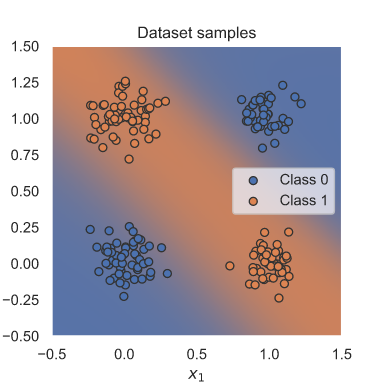

### The model

The package `torch.nn` defines a series of useful classes like linear networks layers, activation functions, loss functions etc. A full list can be found [here](https://pytorch.org/docs/stable/nn.html). 

In [ ]:
import torch.nn as nn

Additionally to `torch.nn`, there is also `torch.nn.functional`. It contains functions that are used in network layers. This is in contrast to `torch.nn` which defines them as `nn.Modules`, and `torch.nn` actually uses a lot of functionalities from `torch.nn.functional`. Hence, the functional package is useful in many situations, and so we import it as well here.

In [ ]:
import torch.nn.functional as F

#### nn.Module

In PyTorch, a neural network is comprised of modules. Modules can contain other modules, and a neural network is considered to be a module itself as well. 

The basic template of a module is as follows:

In [ ]:
class MyModule(nn.Module):
    
    def __init__(self):
        super().__init__()
        # Some init for my module
        
    def forward(self, x):
        # Function for performing the calculation of the module.
        pass

The `forward` method is where the computation of the module is taken place, and is executed when you call the module (`nn = MyModule(); nn(x)`). In the `__init__` method we specify the parameters of the module using `nn.Parameter` or defining other modules that are used in the forward function. The backward calculation is done automatically, but could be overriden with a custom `backward` method as needed.

#### Simple classifier
We can now make use of the pre-defined modules in the `torch.nn` package, and define our own small neural network. We will use a minimal network with a input layer, one hidden layer with tanh as activation function, and a output layer. 

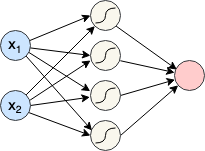

The input neurons are shown in blue, which represent the coordinates $x_1$ and $x_2$ of a data point. The hidden neurons including a tanh activation are shown in white, and the output neuron in red.
In PyTorch, we can define this as follows:

In [ ]:
class SimpleClassifier(nn.Module):

    def __init__(self, num_inputs, num_hidden, num_outputs):
        super().__init__()
        # Initialize the modules we need to build the network
        self.linear1 = nn.Linear(num_inputs, num_hidden)
        self.act_fn = nn.Tanh()
        self.linear2 = nn.Linear(num_hidden, num_outputs)

    def forward(self, x):
        # Perform the calculation of the model to determine the prediction
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        return x

For the examples in this notebook, we will use a tiny neural network with two input neurons and four hidden neurons. As we perform binary classification, we will use a single output neuron. Note that we do not apply an activation to the output. This is because other functions, especially the loss, are more efficient and precise to calculate on the original outputs instead of the sigmoid output. 

In [ ]:
model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
model

The parameters of a module can be obtained by using its `parameters()` functions, or `named_parameters()` to get a name to each parameter object. 

In [ ]:
for name, param in model.named_parameters():
    print(f"Parameter {name}, shape {param.shape}")

Each linear layer has a weight matrix of the shape `[output, input]`, and a bias of the shape `[output]`. The tanh activation function does not have any parameters. Note that parameters are only registered for `nn.Module` objects that are attributes of the class. If you define a list of modules, the parameters of those are not registered for the outer module and can cause some issues when you try to optimize your module. There are alternatives, like `nn.ModuleList`, `nn.ModuleDict` and `nn.Sequential`, that allow you to have different data structures of modules. 

#### Custom XOR Dataset

To define a custom dataset in PyTorch, we simply specify two functions: `__getitem__`, and `__len__`. The `__getitem__` method returns the `idx`-indexed data point in the dataset, while the `__len__` method returns the size of the dataset. 

In [ ]:
import torch.utils.data as data

class XORDataset(data.Dataset):

    def __init__(self, size, std=0.1):
        """
        Inputs:
            size - Number of data points we want to generate
            std - Standard deviation of the noise (see generate_continuous_xor function)
        """
        super().__init__()
        self.size = size
        self.std = std
        self.generate_continuous_xor()

    def generate_continuous_xor(self):
        # Each data point in the XOR dataset has two variables, x and y, that can be either 0 or 1
        # The label is their XOR combination, i.e. 1 if only x or only y is 1 while the other is 0.
        # If x=y, the label is 0.
        data = torch.randint(low=0, high=2, size=(self.size, 2), dtype=torch.float32)
        label = (data.sum(dim=1) == 1).to(torch.long)
        # To make it slightly more challenging, we add a bit of gaussian noise to the data points.
        data += self.std * torch.randn(data.shape)

        self.data = data
        self.label = label

    def __len__(self):
        # Number of data point we have. Alternatively self.data.shape[0], or self.label.shape[0]
        return self.size

    def __getitem__(self, idx):
        # Return the idx-th data point of the dataset
        # If we have multiple things to return (data point and label), we can return them as tuple
        data_point = self.data[idx]
        data_label = self.label[idx]
        return data_point, data_label

Let's try to create such a dataset and inspect it:

In [ ]:
dataset = XORDataset(size=200)
print("Size of dataset:", len(dataset))
print("Data point 0:", dataset[0])

In [ ]:
def visualize_samples(data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    plt.figure(figsize=(4,4))
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()

In [ ]:
visualize_samples(dataset.data, dataset.label)
plt.show()

Let's create a simple data loader:

In [ ]:
data_loader = torch.utilis.data.DataLoader(dataset, batch_size=8, shuffle=True)

The data loader is iterable; `next(iter(...))` catches the first batch of the loader
If `shuffle` is `True`, this will return a different batch every time we run this cell.


In [ ]:
data_inputs, data_labels = next(iter(data_loader))

The shape of the outputs are `[batch_size, d_1,...,d_N]` where `d_1,...,d_N` are the 
dimensions of the data point returned from the dataset class

In [ ]:
print("Data inputs", data_inputs.shape, "\n", data_inputs)
print("Data labels", data_labels.shape, "\n", data_labels)

### Optimization

After defining the model and the dataset, it is time to prepare the optimization of the model. During training, we will perform the following steps:

1. Get a batch from the data loader
2. Obtain the predictions from the model for the batch
3. Calculate the loss based on the difference between predictions and labels
4. Backpropagation: calculate the gradients for every parameter with respect to the loss
5. Update the parameters of the model in the direction of the gradients

We have seen how we can do step 1, 2 and 4 in PyTorch. Now, we will look at step 3 and 5.

#### Loss modules

We can calculate the loss for a batch by simply performing a few tensor operations as those are automatically added to the computation graph. For instance, for binary classification, we can use Binary Cross Entropy (BCE) which is defined as follows:

$$\mathcal{L}_{BCE} = -\sum_i \left[ y_i \log x_i + (1 - y_i) \log (1 - x_i) \right]$$

where $y$ are our labels, and $x$ our predictions, both in the range of $[0,1]$. However, PyTorch already provides a list of predefined loss functions which we can use (see [here](https://pytorch.org/docs/stable/nn.html#loss-functions) for a full list). For instance, for BCE, PyTorch has two modules: `nn.BCELoss()`, `nn.BCEWithLogitsLoss()`. While `nn.BCELoss` expects the inputs $x$ to be in the range $[0,1]$, i.e. the output of a sigmoid, `nn.BCEWithLogitsLoss` combines a sigmoid layer and the BCE loss in a single class. This version is numerically more stable than using a standard sigmoid followed by a BCE loss because of the logarithms applied in the loss function. Hence, it is best to use loss functions applied on logits where possible. For our model, we therefore use the module `nn.BCEWithLogitsLoss`. 

In [ ]:
loss_module = nn.BCEWithLogitsLoss()

#### Stochastic Gradient Descent

For updating the parameters, PyTorch provides the package `torch.optim` that has most popular optimizers implemented. We will discuss the specific optimizers and their differences later in the course, but will for now use the simplest of them: `torch.optim.SGD`. Stochastic Gradient Descent updates parameters by multiplying the gradients with a small constant, called learning rate, and subtracting those from the parameters (hence minimizing the loss). Therefore, we slowly move towards the direction of minimizing the loss. A good default value of the learning rate for a small network is 0.1. 

The input to the optimizer are the parameters of the model `model.parameters()`


In [ ]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

The optimizer provides two useful methods: `step()`, and `zero_grad()`. The `step()` method updates the parameters based on the gradients as explained above, while `zero_grad()` sets the gradients of all parameters to zero. While this function seems less relevant at first, it is a crucial step before performing backpropagation. If we would call the `backward` function on the loss while the parameter gradients are non-zero from the previous batch, the new gradients would actually be added to the previous ones instead of overwriting them. This is done because a parameter might occur multiple times in a computation graph, and we need to sum the gradients in this case instead of replacing them. Hence, remember to call `optimizer.zero_grad()` before calculating the gradients of a batch.

### Training

Finally, we are ready to train our model. As a first step, we create a slightly larger dataset and specify a data loader with a larger batch size. 

In [ ]:
train_dataset = XORDataset(size=2500)
train_data_loader = data.DataLoader(train_dataset, batch_size=128, shuffle=True)

Now, we can write a small training function. Remember the five steps: 

1. load a batch
2. obtain the predictions
3. calculate the loss
4. backpropagate
5. update 
 
Additionally, we have to push all data and model parameters to the device of our choice (GPU if available). For our simple example, communicating the data to the GPU actually takes much more time than we could save from running the operation on GPU. For large networks, the communication time is significantly smaller than the actual runtime making a GPU crucial in these cases. Nevertheless, we will push the data to GPU here. 

In [ ]:
# Push model to device. Has to be only done once
model.to(device)

In addition, we set our model to training mode. This is done by calling `model.train()`. There exist certain modules that need to perform a different forward step during training than during testing (e.g. `BatchNorm` and `Dropout`), and we can switch between them using `model.train()` and `model.eval()`.

In [ ]:
from tqdm import tqdm

def train_model(model, optimizer, data_loader, loss_module, num_epochs=100):
    # Set model to train mode
    model.train() 
    
    # Training loop
    for epoch in tqdm(range(num_epochs)):
        for data_inputs, data_labels in data_loader:
            
            ## Step 1: Move input data to device (only strictly necessary if we use GPU)
            data_inputs = data_inputs.to(device)
            data_labels = data_labels.to(device)
            
            ## Step 2: Run the model on the input data
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1) # Output is [Batch size, 1], but we want [Batch size]
            
            ## Step 3: Calculate the loss
            loss = loss_module(preds, data_labels.float())
            
            ## Step 4: Perform backpropagation
            # Before calculating the gradients, we need to ensure that they are all zero. 
            # The gradients would not be overwritten, but actually added to the existing ones.
            optimizer.zero_grad() 
            # Perform backpropagation
            loss.backward()
            
            ## Step 5: Update the parameters
            optimizer.step()

In [ ]:
train_model(model, optimizer, train_data_loader, loss_module)

#### Saving a model

After finish training a model, we serialize the model to disk so that we can use the same weights to reconstruct the model when needed. For this, we extract the `state_dict` from the model which contains all learnable parameters. 

In [ ]:
state_dict = model.state_dict()
print(state_dict)

To save the state dictionary, we can use `torch.save`:

In [ ]:
torch.save(state_dict, "our_model.tar")

To load a model from a state dict, we use the function `torch.load` to load the state dict from the disk, and the module function `load_state_dict` to overwrite our parameters with the new values:

In [ ]:
# Load state dict from the disk (make sure it is the same name as above)
state_dict = torch.load("our_model.tar")

# Create a new model and load the state
new_model = SimpleClassifier(num_inputs=2, num_hidden=4, num_outputs=1)
new_model.load_state_dict(state_dict)

# Verify that the parameters are the same
print("Original model\n", model.state_dict())
print("\nLoaded model\n", new_model.state_dict())

A detailed tutorial on saving and loading models in PyTorch can be found [here](https://pytorch.org/tutorials/beginner/saving_loading_models.html).

### Evaluation

Once we have trained a model, it is time to evaluate it on a held-out test set. As our dataset consist of randomly generated data points, we need to first create a test set with a corresponding data loader.

In [ ]:
test_dataset = XORDataset(size=500)
test_data_loader = data.DataLoader(test_dataset, batch_size=128, shuffle=False, drop_last=False) 

As metric, we will use **accuracy** which is calculated as follows:

$$acc = \frac{\#\text{correct predictions}}{\#\text{all predictions}} = \frac{TP+TN}{TP+TN+FP+FN}$$

where TP are the true positives, TN true negatives, FP false positives, and FN the fale negatives. 

When evaluating the model, we don't need to keep track of the computation graph as we don't intend to calculate the gradients. This reduces the required memory and speed up the model. In PyTorch, we can temporarily deactivate the computation graph using a context manager. 

Remember to set the model to eval mode.

In [ ]:
def eval_model(model, data_loader):
    model.eval() # Set model to eval mode
    true_preds, num_preds = 0., 0.
    
    with torch.no_grad(): # Deactivate gradients for the following code
        for data_inputs, data_labels in data_loader:
            
            # Determine prediction of model on dev set
            data_inputs, data_labels = data_inputs.to(device), data_labels.to(device)
            preds = model(data_inputs)
            preds = preds.squeeze(dim=1)
            preds = torch.sigmoid(preds) # Sigmoid to map predictions between 0 and 1
            pred_labels = (preds >= 0.5).long() # Binarize predictions to 0 and 1
            
            # Keep records of predictions for the accuracy metric (true_preds=TP+TN, num_preds=TP+TN+FP+FN)
            true_preds += (pred_labels == data_labels).sum()
            num_preds += data_labels.shape[0]
            
    acc = true_preds / num_preds
    print(f"Accuracy of the model: {100.0*acc:4.2f}%")

In [ ]:
eval_model(model, test_data_loader)

#### Visualizing classification boundaries

To visualize what our model has learned, we can perform a prediction for every data point in a range of $[-0.5, 1.5]$, and visualize the predicted class as in the sample figure at the beginning of this section. This shows where the model has created decision boundaries, and which points would be classified as $0$, and which as $1$. We therefore get a background image out of blue (class 0) and orange (class 1). The spots where the model is uncertain we will see a blurry overlap. The specific code is less relevant compared to the output figure which should hopefully show us a clear separation of classes:

In [ ]:
from matplotlib.colors import to_rgba

@torch.no_grad()
def visualize_classification(model, data, label):
    if isinstance(data, torch.Tensor):
        data = data.cpu().numpy()
    if isinstance(label, torch.Tensor):
        label = label.cpu().numpy()
    data_0 = data[label == 0]
    data_1 = data[label == 1]
    
    fig = plt.figure(figsize=(4,4), dpi=100)
    plt.scatter(data_0[:,0], data_0[:,1], edgecolor="#333", label="Class 0")
    plt.scatter(data_1[:,0], data_1[:,1], edgecolor="#333", label="Class 1")
    plt.title("Dataset samples")
    plt.ylabel(r"$x_2$")
    plt.xlabel(r"$x_1$")
    plt.legend()
    
    # Let's make use of a lot of operations we have learned above
    model.to(device)
    c0 = torch.Tensor(to_rgba("C0")).to(device)
    c1 = torch.Tensor(to_rgba("C1")).to(device)
    x1 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    x2 = torch.arange(-0.5, 1.5, step=0.01, device=device)
    xx1, xx2 = torch.meshgrid(x1, x2)  # Meshgrid function as in numpy
    model_inputs = torch.stack([xx1, xx2], dim=-1)
    preds = model(model_inputs)
    preds = torch.sigmoid(preds)
    output_image = (1 - preds) * c0[None,None] + preds * c1[None,None]  # Specifying "None" in a dimension creates a new one
    output_image = output_image.cpu().numpy()  # Convert to numpy array. This only works for tensors on CPU, hence first push to CPU
    plt.imshow(output_image, origin='lower', extent=(-0.5, 1.5, -0.5, 1.5))
    plt.grid(False)
    return fig

_ = visualize_classification(model, dataset.data, dataset.label)
plt.show()

The decision boundaries might not look exactly as in the figure in the preamble of this section which can be caused by running it on CPU or a different GPU architecture. Nevertheless, the result on the accuracy metric should be the approximately the same. 

## Exercise

Build a multi-layer network to predict the grape varietal from the wine dataset.

In [ ]:
import pandas as pd

wine = pd.read_table("../data/wine.dat", sep='\s+')

attributes = ['Alcohol',
            'Malic acid',
            'Ash',
            'Alcalinity of ash',
            'Magnesium',
            'Total phenols',
            'Flavanoids',
            'Nonflavanoid phenols',
            'Proanthocyanins',
            'Color intensity',
            'Hue',
            'OD280/OD315 of diluted wines',
            'Proline']

grape = wine.pop('region')
y = grape.values-1
X = wine.values

In [ ]:
# Write your answer here

---
## References

- [Deep Learning with PyTorch](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)
- [University of Amsterdam Deep Learning Tutorials](https://uvadlc-notebooks.readthedocs.io/en/latest/)